In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import os
from glob import glob


import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [2]:
def get_max_frequency(file_path):
    y, sr = librosa.load(file_path)
    # Compute the short-time Fourier transform
    D = np.abs(librosa.stft(y))
    # Compute the frequency range
    freqs = librosa.fft_frequencies(sr=sr)
    # Compute the average power spectral density
    avg_psd = np.mean(librosa.amplitude_to_db(D, ref=np.max), axis=1)
    # Find the frequency with the maximum power spectral density
    max_freq = freqs[np.argmax(avg_psd)]
    return max_freq

def calculate_average(frequency: float):
    # Calculate the average of the highest frequencies
    avg_max_freq = np.mean(frequency)
    print(f"Average highest frequency: {avg_max_freq} Hz")

    # Suggest a sample rate (double the average highest frequency, rounded up to nearest standard rate)
    suggested_sample_rate = int(np.ceil(avg_max_freq * 2 / 1000) * 1000)
    print(f"Suggested sample rate: {suggested_sample_rate} Hz")


In [3]:

audio_files = glob('/Users/jaimacabangon/Downloads/slider_0db/*/*/*.wav')
audio_files_minus_6 = glob('/Users/jaimacabangon/Downloads/slider_-6db/*/*/*.wav')
audio_files_6 = glob('/Users/jaimacabangon/Downloads/slider_6db/*/*/*.wav')

audio_files.extend(audio_files_6)
audio_files.extend(audio_files_minus_6)

In [4]:
print(len(audio_files), audio_files[0])

12282 /Users/jaimacabangon/Downloads/slider_0db/id_00/abnormal/00000059.wav


In [5]:
# Abnormal sound
ipd.Audio(audio_files[0])

#### Y = Raw Value
#### Sample Rate

In [6]:
y, sample_rate = librosa.load(audio_files[0])
print(f'Raw data (10): {y[:10]}')
print(f'Raw data shape: {y.shape}')
print(f'Sample Rate: {sample_rate}')

Raw data (10): [-0.00550228 -0.00627572 -0.00351764 -0.00183896 -0.00185569 -0.00143667
 -0.00038591  0.00049011  0.00051503  0.00038816]
Raw data shape: (220500,)
Sample Rate: 22050


### Raw Audio sample (No Fourier Transform)

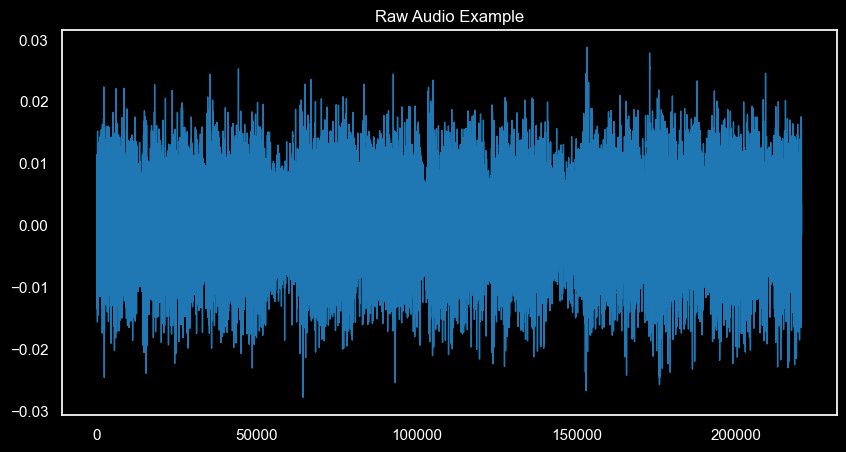

In [91]:
plt.style.use('dark_background')

pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

### Zoomed in view 100000 <-> 150000

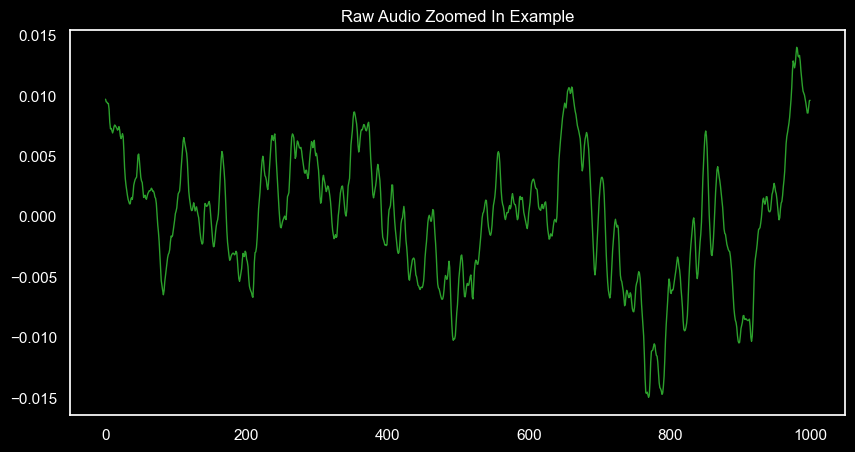

In [92]:
plt.style.use('dark_background')


pd.Series(y[149000:150000]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In Example',
                 color=color_pal[2])
plt.show()

In [9]:
test = audio_files[0]
new = test.split('/')
print(new)

['', 'Users', 'jaimacabangon', 'Downloads', 'slider_0db', 'id_00', 'abnormal', '00000059.wav']


In [10]:
raw_data_list = [] 
sample_rate_list = []
sound_source_list = [] 
binary_classification_list = [] 
wav_file_list = [] 

for audio_file in audio_files:
    split_string = str(audio_file).split('/')
    sound_source = split_string[4]
    binary_classification = split_string[6]
    wav_file = split_string[7]
    raw_data, sample_rate = librosa.load(audio_file)
    sound_source_list.append(sound_source)
    binary_classification_list.append(binary_classification)
    wav_file_list.append(wav_file)
    raw_data_list.append(raw_data)
    sample_rate_list.append(sample_rate)


    

In [11]:
df = pd.DataFrame(columns=["Sound Source", "Classification", ".wav File", "Sample Rate", "Raw Data"])

In [12]:
df["Sound Source"] = sound_source_list
df["Classification"] = binary_classification_list
df[".wav File"] = wav_file_list
df["Sample Rate"] = sample_rate_list
df["Raw Data"] = raw_data_list

In [13]:
df.head()

Sound Source Classification     .wav File  Sample Rate  \
0   slider_0db       abnormal  00000059.wav        22050   
1   slider_0db       abnormal  00000071.wav        22050   
2   slider_0db       abnormal  00000065.wav        22050   
3   slider_0db       abnormal  00000273.wav        22050   
4   slider_0db       abnormal  00000267.wav        22050   

                                            Raw Data  
0  [-0.005502276, -0.00627572, -0.0035176447, -0....  
1  [0.0004954897, -0.00032862843, 0.0028573577, 0...  
2  [-0.0034265274, -0.003140213, -0.0019201312, -...  
3  [-0.003937617, -0.0030202034, -0.0038513737, -...  
4  [0.0010819818, 0.0014553432, 0.0013565697, 0.0...

In [14]:
df['Mean'] = df['Raw Data'].apply(np.mean)

In [15]:
df['Standard Deviation'] = df['Raw Data'].apply(np.std)
df['Max Value'] = df['Raw Data'].apply(np.max)
df['Min Value'] = df['Raw Data'].apply(np.min)

In [16]:
df.head()

Sound Source Classification     .wav File  Sample Rate  \
0   slider_0db       abnormal  00000059.wav        22050   
1   slider_0db       abnormal  00000071.wav        22050   
2   slider_0db       abnormal  00000065.wav        22050   
3   slider_0db       abnormal  00000273.wav        22050   
4   slider_0db       abnormal  00000267.wav        22050   

                                            Raw Data          Mean  \
0  [-0.005502276, -0.00627572, -0.0035176447, -0.... -1.793349e-07   
1  [0.0004954897, -0.00032862843, 0.0028573577, 0... -5.717943e-07   
2  [-0.0034265274, -0.003140213, -0.0019201312, -...  1.500820e-06   
3  [-0.003937617, -0.0030202034, -0.0038513737, -...  2.199145e-06   
4  [0.0010819818, 0.0014553432, 0.0013565697, 0.0...  1.295688e-06   

   Standard Deviation  Max Value  Min Value  
0            0.008583   0.038188  -0.039474  
1            0.008407   0.035557  -0.036560  
2            0.008471   0.033797  -0.037301  
3            0.008697   0.037978  -0.039850  
4            0.008660   0.039995  -0.036825

In [17]:
df.loc[0]

Sound Source                                                 slider_0db
Classification                                                 abnormal
.wav File                                                  00000059.wav
Sample Rate                                                       22050
Raw Data              [-0.005502276, -0.00627572, -0.0035176447, -0....
Mean                                                               -0.0
Standard Deviation                                             0.008583
Max Value                                                      0.038188
Min Value                                                     -0.039474
Name: 0, dtype: object

In [18]:
df["Classification"].value_counts()

Classification
normal      9612
abnormal    2670
Name: count, dtype: int64

In [19]:
df["Sound Source"].value_counts()

Sound Source
slider_0db     4094
slider_6db     4094
slider_-6db    4094
Name: count, dtype: int64

In [20]:
df.describe()

Sample Rate          Mean  Standard Deviation     Max Value  \
count      12282.0  1.228200e+04        12282.000000  12282.000000   
mean       22050.0 -2.869023e-07            0.006748      0.032898   
std            0.0  2.191270e-06            0.002542      0.011143   
min        22050.0 -1.262301e-05            0.002508      0.013050   
25%        22050.0 -1.437922e-06            0.004530      0.024349   
50%        22050.0 -2.385245e-07            0.005844      0.030252   
75%        22050.0  9.147942e-07            0.009426      0.040847   
max        22050.0  1.140960e-05            0.014739      0.164767   

          Min Value  
count  12282.000000  
mean      -0.032652  
std        0.011701  
min       -0.147535  
25%       -0.040924  
50%       -0.030094  
75%       -0.023502  
max       -0.013443

In [21]:
df["Classification"].describe()

count      12282
unique         2
top       normal
freq        9612
Name: Classification, dtype: object

### Data taken at consistent sample rate of 22050
### Abnormal vs normal samples are not 50:50
#### Normal % = 78.3%
#### Abnormal % = 21.7%


### Given Sample rate is consistent, reducing sample rate is not recommended as we could lose audio quality. 

In [22]:
df["Classification"] == "abnormal"

0         True
1         True
2         True
3         True
4         True
         ...  
12277    False
12278    False
12279    False
12280    False
12281    False
Name: Classification, Length: 12282, dtype: bool

In [23]:
df.loc[0]

Sound Source                                                 slider_0db
Classification                                                 abnormal
.wav File                                                  00000059.wav
Sample Rate                                                       22050
Raw Data              [-0.005502276, -0.00627572, -0.0035176447, -0....
Mean                                                               -0.0
Standard Deviation                                             0.008583
Max Value                                                      0.038188
Min Value                                                     -0.039474
Name: 0, dtype: object

In [24]:
df.loc[4089]

Sound Source                                                 slider_0db
Classification                                                   normal
.wav File                                                  00000068.wav
Sample Rate                                                       22050
Raw Data              [0.0076968097, 0.008207024, 0.0054778242, 0.00...
Mean                                                          -0.000001
Standard Deviation                                             0.007036
Max Value                                                      0.027137
Min Value                                                     -0.027567
Name: 4089, dtype: object

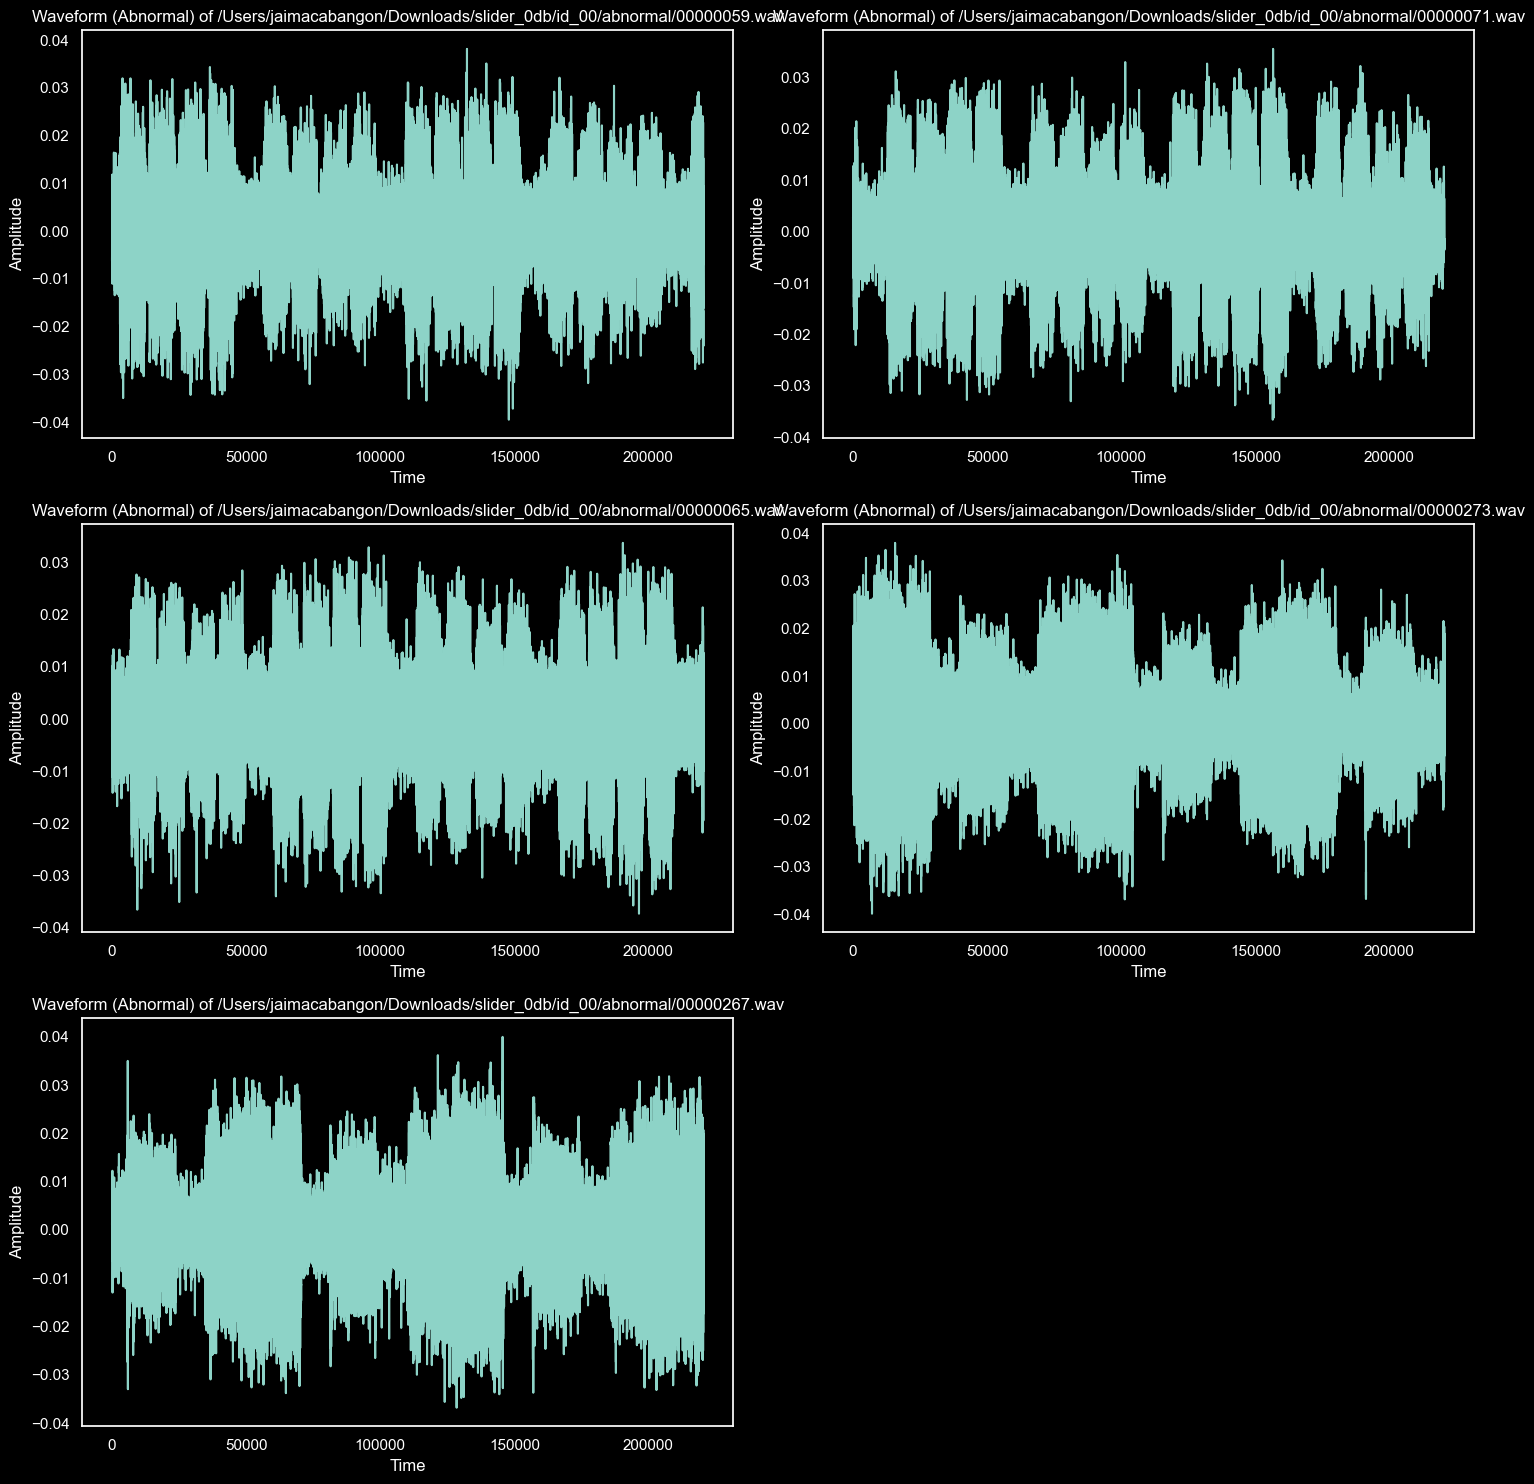

In [93]:
# Number of audio files
num_files = len(audio_files[0:5])

# Calculate the number of rows and columns for subplots
rows = (num_files + 1) // 2
cols = 2

plt.style.use('dark_background')

# Create a figure with the appropriate number of subplots
fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over the audio files and plot each one
for i, file in enumerate(audio_files[0:5]):
    # Load the audio file
    y, sample_rate = librosa.load(file)
    
    # Plot the waveform
    axs[i].plot(y)
    axs[i].set_title(f'Waveform (Abnormal) of {file}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Amplitude')

# Hide any empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()

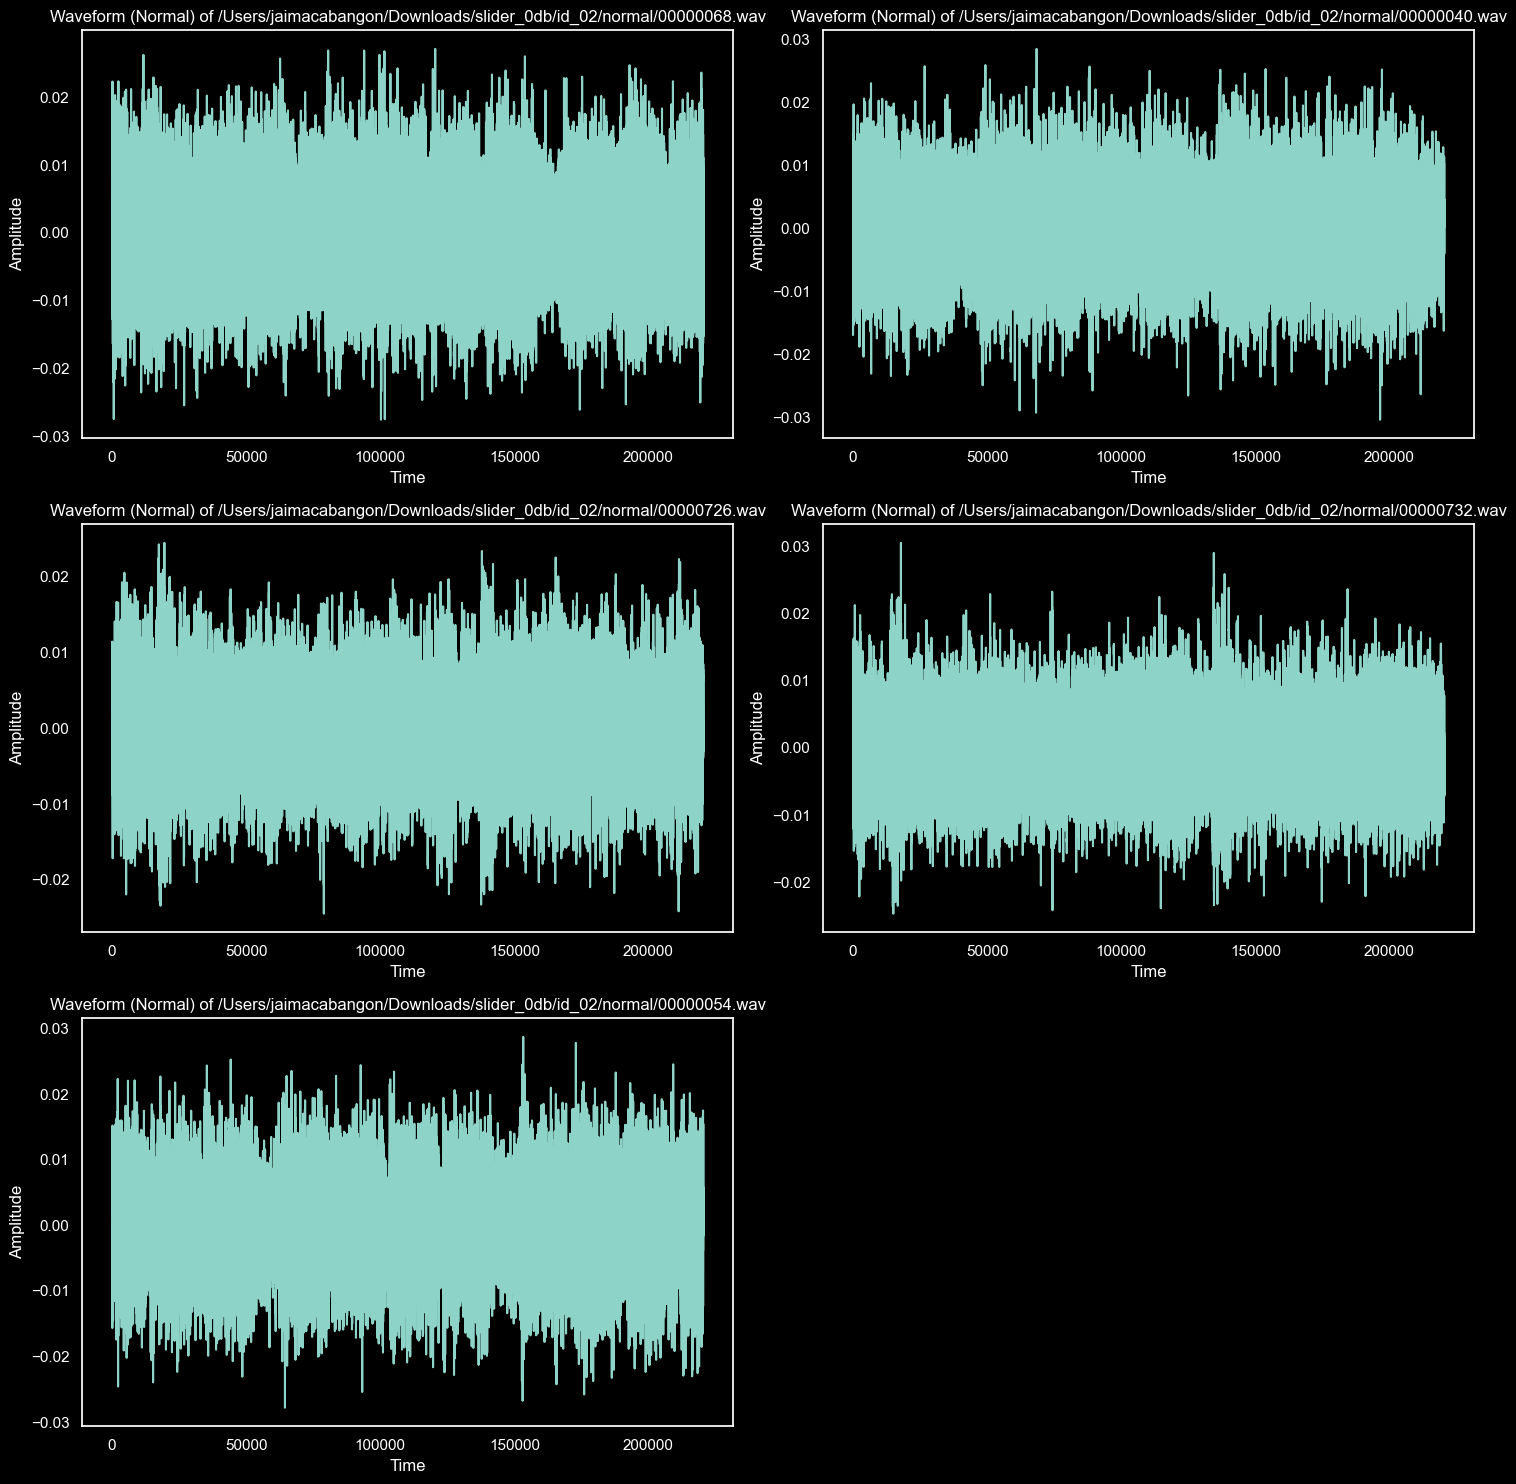

In [94]:
# Number of audio files
num_files = len(audio_files[4089:4094])

# Calculate the number of rows and columns for subplots
rows = (num_files + 1) // 2
cols = 2

# Create a figure with the appropriate number of subplots
fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Flatten the axs array for easier iteration
axs = axs.flatten()
plt.style.use('dark_background')


# Iterate over the audio files and plot each one
for i, file in enumerate(audio_files[4089:4094]):
    # Load the audio file
    y, sample_rate = librosa.load(file)
    
    # Plot the waveform
    axs[i].plot(y)
    axs[i].set_title(f'Waveform (Normal) of {file}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Amplitude')

# Hide any empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()

# RMS AND ZCR Calculations

In [27]:
def calculate_rms(signal):
    """Calculate RMS power of the signal."""
    return np.sqrt(np.mean(np.square(signal)))

def calculate_zero_crossing_rate(signal):
    """Calculate zero-crossing rate of the signal."""
    return np.mean(librosa.zero_crossings(signal, pad=False))

In [28]:
df.head()

Sound Source Classification     .wav File  Sample Rate  \
0   slider_0db       abnormal  00000059.wav        22050   
1   slider_0db       abnormal  00000071.wav        22050   
2   slider_0db       abnormal  00000065.wav        22050   
3   slider_0db       abnormal  00000273.wav        22050   
4   slider_0db       abnormal  00000267.wav        22050   

                                            Raw Data          Mean  \
0  [-0.005502276, -0.00627572, -0.0035176447, -0.... -1.793349e-07   
1  [0.0004954897, -0.00032862843, 0.0028573577, 0... -5.717943e-07   
2  [-0.0034265274, -0.003140213, -0.0019201312, -...  1.500820e-06   
3  [-0.003937617, -0.0030202034, -0.0038513737, -...  2.199145e-06   
4  [0.0010819818, 0.0014553432, 0.0013565697, 0.0...  1.295688e-06   

   Standard Deviation  Max Value  Min Value  
0            0.008583   0.038188  -0.039474  
1            0.008407   0.035557  -0.036560  
2            0.008471   0.033797  -0.037301  
3            0.008697   0.037978  -0.039850  
4            0.008660   0.039995  -0.036825

In [29]:
df["RMS"] = df["Raw Data"].apply(calculate_rms)
df["ZCR"] = df["Raw Data"].apply(calculate_zero_crossing_rate)

In [30]:
df

Sound Source Classification     .wav File  Sample Rate  \
0       slider_0db       abnormal  00000059.wav        22050   
1       slider_0db       abnormal  00000071.wav        22050   
2       slider_0db       abnormal  00000065.wav        22050   
3       slider_0db       abnormal  00000273.wav        22050   
4       slider_0db       abnormal  00000267.wav        22050   
...            ...            ...           ...          ...   
12277  slider_-6db         normal  00000068.wav        22050   
12278  slider_-6db         normal  00000040.wav        22050   
12279  slider_-6db         normal  00000726.wav        22050   
12280  slider_-6db         normal  00000732.wav        22050   
12281  slider_-6db         normal  00000054.wav        22050   

                                                Raw Data          Mean  \
0      [-0.005502276, -0.00627572, -0.0035176447, -0.... -1.793349e-07   
1      [0.0004954897, -0.00032862843, 0.0028573577, 0... -5.717943e-07   
2      [-0.0034265274, -0.003140213, -0.0019201312, -...  1.500820e-06   
3      [-0.003937617, -0.0030202034, -0.0038513737, -...  2.199145e-06   
4      [0.0010819818, 0.0014553432, 0.0013565697, 0.0...  1.295688e-06   
...                                                  ...           ...   
12277  [-0.006462358, -0.008424828, -0.008655942, -0.... -3.078291e-06   
12278  [0.011443899, 0.014070256, 0.013498405, 0.0159... -5.568735e-07   
12279  [-0.02010223, -0.020417044, -0.01349025, -0.01... -2.619118e-06   
12280  [-0.006017455, -0.0051297885, -0.0020211902, -...  1.961624e-06   
12281  [-0.008127679, -0.009038082, -0.0076678353, -0... -6.374302e-06   

       Standard Deviation  Max Value  Min Value       RMS       ZCR  
0                0.008583   0.038188  -0.039474  0.008583  0.073578  
1                0.008407   0.035557  -0.036560  0.008407  0.062136  
2                0.008471   0.033797  -0.037301  0.008471  0.069583  
3                0.008697   0.037978  -0.039850  0.008697  0.063900  
4                0.008660   0.039995  -0.036825  0.008660  0.063079  
...                   ...        ...        ...       ...       ...  
12277            0.010764   0.043541  -0.040659  0.010764  0.041397  
12278            0.010703   0.050001  -0.041993  0.010703  0.039152  
12279            0.010095   0.043815  -0.046845  0.010095  0.046644  
12280            0.010030   0.043962  -0.040243  0.010030  0.049197  
12281            0.011058   0.041139  -0.045663  0.011058  0.041628  

[12282 rows x 11 columns]

In [31]:
df.describe()

Sample Rate          Mean  Standard Deviation     Max Value  \
count      12282.0  1.228200e+04        12282.000000  12282.000000   
mean       22050.0 -2.869023e-07            0.006748      0.032898   
std            0.0  2.191270e-06            0.002542      0.011143   
min        22050.0 -1.262301e-05            0.002508      0.013050   
25%        22050.0 -1.437922e-06            0.004530      0.024349   
50%        22050.0 -2.385245e-07            0.005844      0.030252   
75%        22050.0  9.147942e-07            0.009426      0.040847   
max        22050.0  1.140960e-05            0.014739      0.164767   

          Min Value           RMS           ZCR  
count  12282.000000  12282.000000  12282.000000  
mean      -0.032652      0.006748      0.067559  
std        0.011701      0.002542      0.028099  
min       -0.147535      0.002508      0.020240  
25%       -0.040924      0.004530      0.046068  
50%       -0.030094      0.005844      0.063494  
75%       -0.023502      0.009426      0.082525  
max       -0.013443      0.014739      0.245946

# Total distribution of RMS/ZCR calculation 

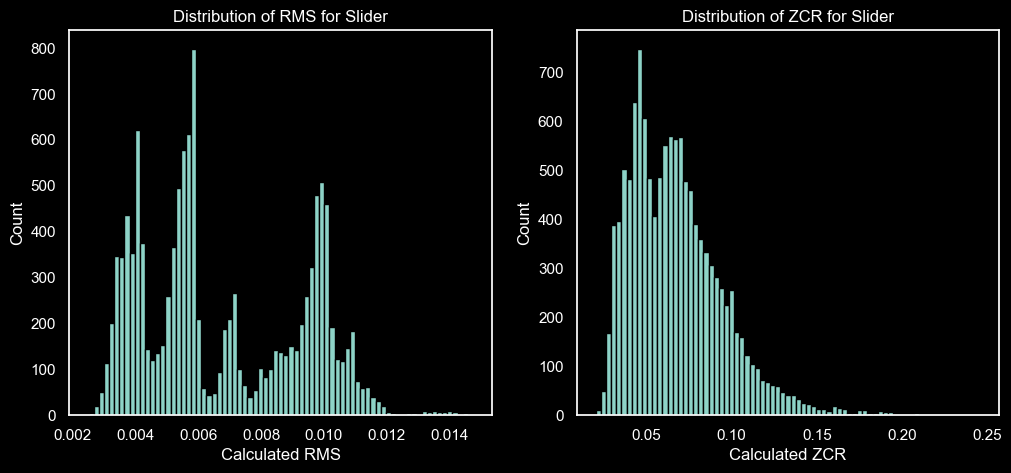

In [95]:
# Create a histogram with matplotlib
# plt.hist(df['RMS'], bins=75, edgecolor='black')
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plt.style.use('dark_background')

# # # Customize the plot
# # plt.xlabel('RMS')
# # plt.ylabel('Count')
# plt.title('Distribution of RMS for 0db Slider')

axs[0].hist(df['RMS'], bins=75, edgecolor='black')
axs[0].set_title('Distribution of RMS for Slider')
axs[0].set_xlabel('Calculated RMS')
axs[0].set_ylabel('Count')

# Histogram for column2
axs[1].hist(df['ZCR'], bins=75, edgecolor='black')
axs[1].set_title('Distribution of ZCR for Slider')
axs[1].set_xlabel('Calculated ZCR')
axs[1].set_ylabel('Count')


# Show the plot
plt.show()

### Breakdown Dataset 

In [40]:
# slider_0db     4094
# slider_-6db    4094

normal_classification = df['Classification'] == 'normal'
abnormal_classification = df['Classification'] == 'abnormal'

source_0_db = df['Sound Source'] == 'slider_0db'
source_minus_6_db = df['Sound Source'] == 'slider_-6db'
source_6_db = df['Sound Source'] == 'slider_6db'


# 0dB filter
normal_filtered_df_0_db = df[normal_classification & source_0_db]
abnormal_filtered_df_0_db = df[abnormal_classification & source_0_db]

# -6dB filter
normal_filtered_df_minus_6_db = df[normal_classification & source_minus_6_db]
abnormal_filtered_df_minus_6_db = df[abnormal_classification & source_minus_6_db]


# 6dB filter
normal_filtered_df_6_db = df[normal_classification & source_6_db]
abnormal_filtered_df_6_db = df[abnormal_classification & source_6_db]

# Normal sound RMS/ZCR distribution
## Indicates lower calculated RMS values most of the samples are around the .0050 -> .0060
### Have to be careful 

# Normal sound distribution (-6dB,0dB)

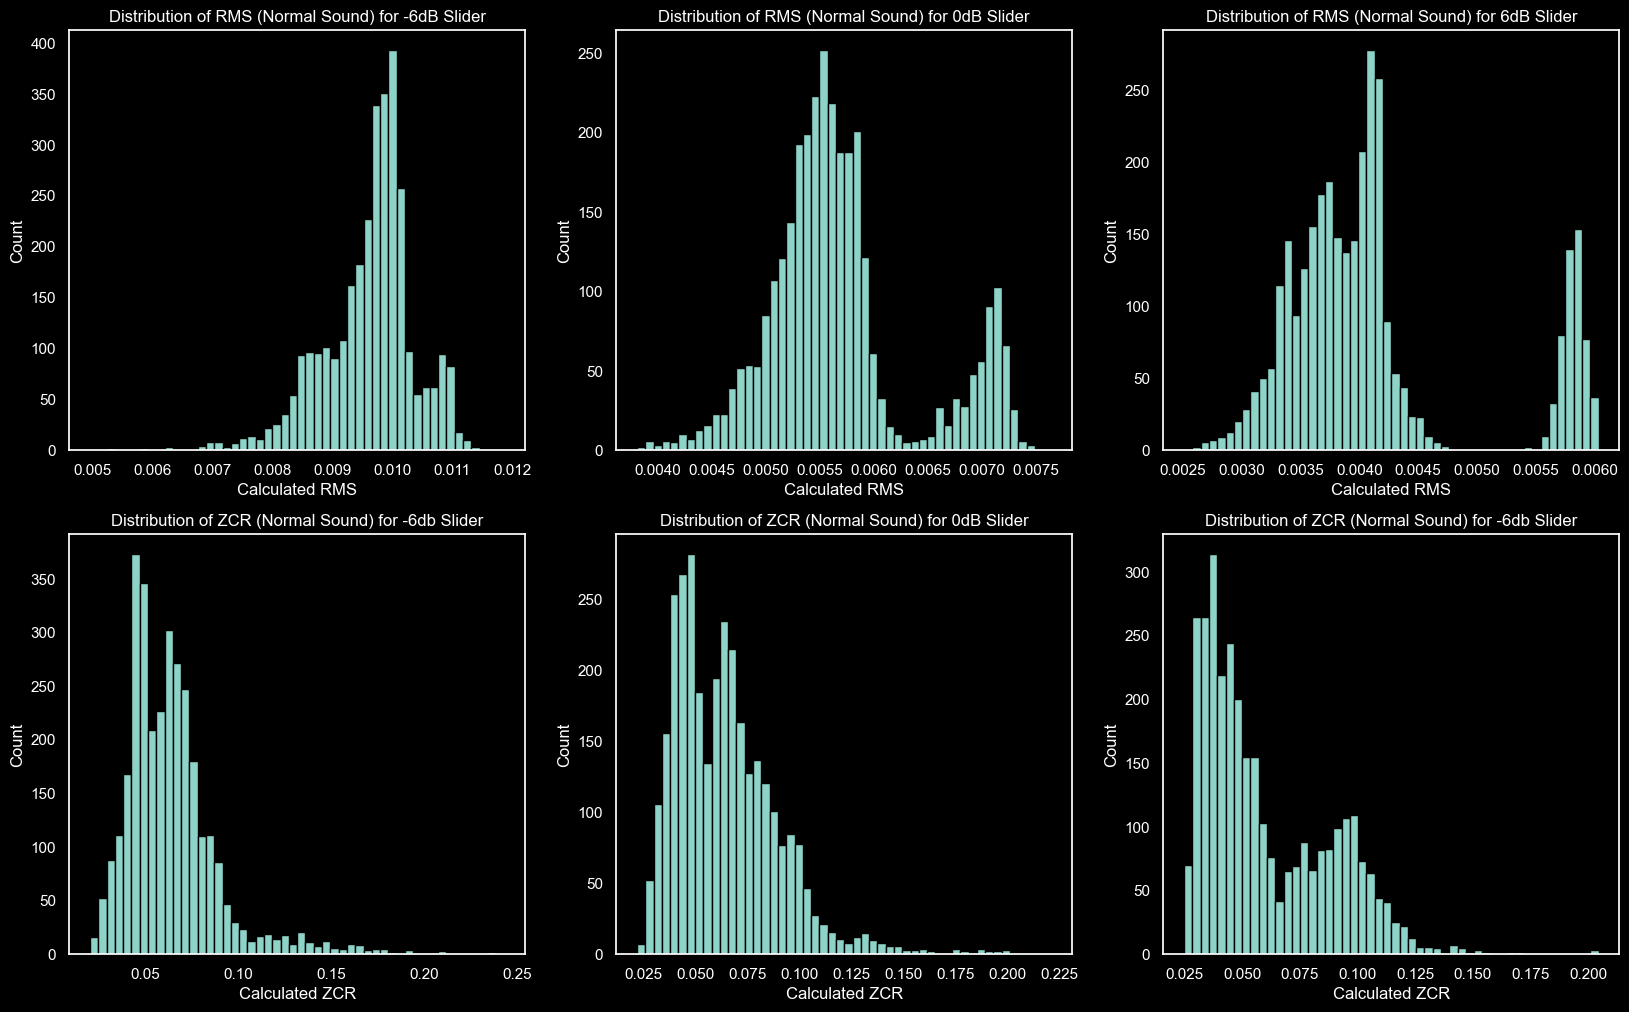

In [96]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))

plt.style.use('dark_background')


axs[0,0].hist(normal_filtered_df_minus_6_db['RMS'], bins=50, edgecolor='black')
axs[0,0].set_title('Distribution of RMS (Normal Sound) for -6dB Slider')
axs[0,0].set_xlabel('Calculated RMS')
axs[0,0].set_ylabel('Count')


axs[0,1].hist(normal_filtered_df_0_db['RMS'], bins=50, edgecolor='black')
axs[0,1].set_title('Distribution of RMS (Normal Sound) for 0dB Slider')
axs[0,1].set_xlabel('Calculated RMS')
axs[0,1].set_ylabel('Count')

axs[0,2].hist(normal_filtered_df_6_db['RMS'], bins=50, edgecolor='black')
axs[0,2].set_title('Distribution of RMS (Normal Sound) for 6dB Slider')
axs[0,2].set_xlabel('Calculated RMS')
axs[0,2].set_ylabel('Count')


# Histogram for column2
axs[1,0].hist(normal_filtered_df_minus_6_db['ZCR'], bins=50, edgecolor='black')
axs[1,0].set_title('Distribution of ZCR (Normal Sound) for -6db Slider')
axs[1,0].set_xlabel('Calculated ZCR')
axs[1,0].set_ylabel('Count')


# Histogram for column2
axs[1,1].hist(normal_filtered_df_0_db['ZCR'], bins=50, edgecolor='black')
axs[1,1].set_title('Distribution of ZCR (Normal Sound) for 0dB Slider')
axs[1,1].set_xlabel('Calculated ZCR')
axs[1,1].set_ylabel('Count')



# Histogram for column2
axs[1,2].hist(normal_filtered_df_6_db['ZCR'], bins=50, edgecolor='black')
axs[1,2].set_title('Distribution of ZCR (Normal Sound) for -6db Slider')
axs[1,2].set_xlabel('Calculated ZCR')
axs[1,2].set_ylabel('Count')



# Show the plot
plt.show()

In [69]:
normal_filtered_df_0_db.describe()

Sample Rate          Mean  Standard Deviation    Max Value  \
count       3204.0  3.204000e+03         3204.000000  3204.000000   
mean       22050.0 -2.581089e-07            0.005687     0.028159   
std            0.0  1.877582e-06            0.000691     0.004452   
min        22050.0 -8.193454e-06            0.003812     0.019551   
25%        22050.0 -1.421222e-06            0.005279     0.025020   
50%        22050.0 -2.486246e-07            0.005562     0.027296   
75%        22050.0  8.769349e-07            0.005868     0.030478   
max        22050.0  7.548776e-06            0.007642     0.062330   

         Min Value          RMS          ZCR  
count  3204.000000  3204.000000  3204.000000  
mean     -0.027731     0.005687     0.064451  
std       0.004656     0.000691     0.025790  
min      -0.065081     0.003812     0.021791  
25%      -0.029928     0.005279     0.044992  
50%      -0.026715     0.005562     0.060846  
75%      -0.024276     0.005868     0.078204  
max      -0.019167     0.007642     0.221016

In [70]:
normal_filtered_df_minus_6_db.describe()

Sample Rate          Mean  Standard Deviation    Max Value  \
count       3204.0  3.204000e+03         3204.000000  3204.000000   
mean       22050.0 -3.897323e-07            0.009614     0.043297   
std            0.0  3.004489e-06            0.000774     0.006892   
min        22050.0 -1.262301e-05            0.004955     0.026233   
25%        22050.0 -2.097628e-06            0.009236     0.039644   
50%        22050.0 -2.875549e-07            0.009751     0.042293   
75%        22050.0  1.429060e-06            0.010054     0.045355   
max        22050.0  1.088122e-05            0.011869     0.164767   

         Min Value          RMS          ZCR  
count  3204.000000  3204.000000  3204.000000  
mean     -0.043256     0.009614     0.064470  
std       0.006721     0.000774     0.026810  
min      -0.147535     0.004955     0.020240  
25%      -0.045354     0.009236     0.046868  
50%      -0.042220     0.009751     0.060515  
75%      -0.039630     0.010054     0.073476  
max      -0.027153     0.011869     0.242875

In [71]:
normal_filtered_df_6_db.describe()

Sample Rate          Mean  Standard Deviation    Max Value  \
count       3204.0  3.204000e+03         3204.000000  3204.000000   
mean       22050.0 -1.989823e-07            0.004132     0.023346   
std            0.0  1.467187e-06            0.000827     0.004769   
min        22050.0 -5.541529e-06            0.002508     0.015127   
25%        22050.0 -1.072762e-06            0.003602     0.019335   
50%        22050.0 -2.057102e-07            0.003957     0.022919   
75%        22050.0  6.975251e-07            0.004195     0.025684   
max        22050.0  5.940924e-06            0.006035     0.041335   

         Min Value          RMS          ZCR  
count  3204.000000  3204.000000  3204.000000  
mean     -0.022357     0.004132     0.060384  
std       0.005026     0.000827     0.027746  
min      -0.042890     0.002508     0.024789  
25%      -0.024662     0.003602     0.037562  
50%      -0.020910     0.003957     0.050549  
75%      -0.018458     0.004195     0.082437  
max      -0.015354     0.006035     0.204408

# Abnormal sound RMS/ZCR distribution

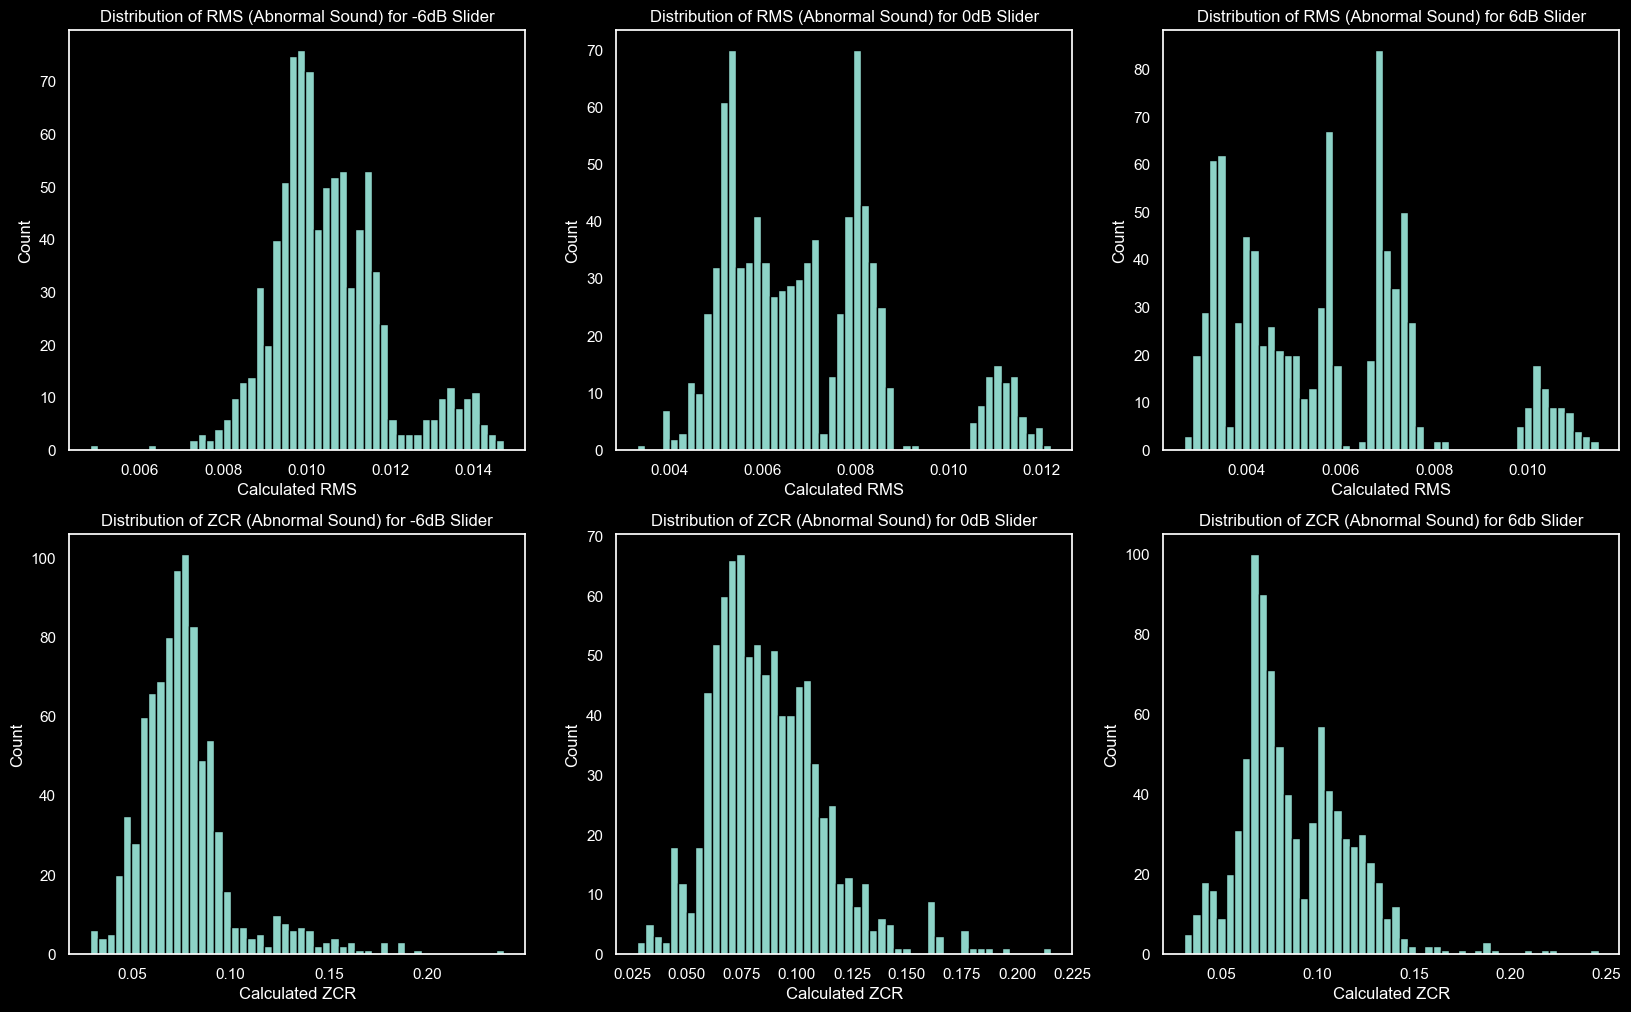

In [97]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))

plt.style.use('dark_background')

axs[0,0].hist(abnormal_filtered_df_minus_6_db['RMS'], bins=50, edgecolor='black')
axs[0,0].set_title('Distribution of RMS (Abnormal Sound) for -6dB Slider')
axs[0,0].set_xlabel('Calculated RMS')
axs[0,0].set_ylabel('Count')

axs[0,1].hist(abnormal_filtered_df_0_db['RMS'], bins=50, edgecolor='black')
axs[0,1].set_title('Distribution of RMS (Abnormal Sound) for 0dB Slider')
axs[0,1].set_xlabel('Calculated RMS')
axs[0,1].set_ylabel('Count')

axs[0,2].hist(abnormal_filtered_df_6_db['RMS'], bins=50, edgecolor='black')
axs[0,2].set_title('Distribution of RMS (Abnormal Sound) for 6dB Slider')
axs[0,2].set_xlabel('Calculated RMS')
axs[0,2].set_ylabel('Count')


axs[1,0].hist(abnormal_filtered_df_minus_6_db['ZCR'], bins=50, edgecolor='black')
axs[1,0].set_title('Distribution of ZCR (Abnormal Sound) for -6dB Slider')
axs[1,0].set_xlabel('Calculated ZCR')
axs[1,0].set_ylabel('Count')


# Histogram for column2
axs[1,1].hist(abnormal_filtered_df_0_db['ZCR'], bins=50, edgecolor='black')
axs[1,1].set_title('Distribution of ZCR (Abnormal Sound) for 0dB Slider')
axs[1,1].set_xlabel('Calculated ZCR')
axs[1,1].set_ylabel('Count')


# Histogram for column2
axs[1,2].hist(abnormal_filtered_df_6_db['ZCR'], bins=50, edgecolor='black')
axs[1,2].set_title('Distribution of ZCR (Abnormal Sound) for 6db Slider')
axs[1,2].set_xlabel('Calculated ZCR')
axs[1,2].set_ylabel('Count')



# Show the plot
plt.show()

# ***Something to note is that RMS distribution overall for abnormal sound is higher, which could indicate that those are the abnormal sound signals we want to predict


In [38]:
abnormal_filtered_df_0_db.describe()

Sample Rate          Mean  Standard Deviation   Max Value   Min Value  \
count        890.0  8.900000e+02          890.000000  890.000000  890.000000   
mean       22050.0 -2.923742e-07            0.006960    0.034590   -0.035284   
std            0.0  1.751605e-06            0.001795    0.010946    0.011797   
min        22050.0 -6.366602e-06            0.003302    0.017352   -0.076337   
25%        22050.0 -1.349175e-06            0.005442    0.027328   -0.038719   
50%        22050.0 -2.008928e-07            0.006690    0.032829   -0.032896   
75%        22050.0  8.304009e-07            0.008018    0.037759   -0.027239   
max        22050.0  4.959097e-06            0.012207    0.072390   -0.019198   

              RMS         ZCR  
count  890.000000  890.000000  
mean     0.006960    0.086448  
std      0.001795    0.025575  
min      0.003302    0.027283  
25%      0.005442    0.068660  
50%      0.006690    0.082639  
75%      0.008018    0.101096  
max      0.012207    0.215692

In [39]:
abnormal_filtered_df_minus_6_db.describe()

Sample Rate          Mean  Standard Deviation   Max Value   Min Value  \
count        890.0  8.900000e+02          890.000000  890.000000  890.000000   
mean       22050.0 -4.244800e-07            0.010491    0.048364   -0.049214   
std            0.0  2.884877e-06            0.001352    0.009400    0.010311   
min        22050.0 -1.050228e-05            0.004800    0.028902   -0.095800   
25%        22050.0 -1.980569e-06            0.009652    0.042410   -0.051994   
50%        22050.0 -3.125370e-07            0.010284    0.046343   -0.047005   
75%        22050.0  1.208462e-06            0.011252    0.050729   -0.042543   
max        22050.0  1.140960e-05            0.014739    0.084223   -0.031388   

              RMS         ZCR  
count  890.000000  890.000000  
mean     0.010491    0.076893  
std      0.001352    0.024340  
min      0.004800    0.028658  
25%      0.009652    0.062117  
50%      0.010284    0.073871  
75%      0.011252    0.084259  
max      0.014739    0.239066

In [79]:
abnormal_filtered_df_6_db.describe()

Sample Rate          Mean  Standard Deviation   Max Value   Min Value  \
count        890.0  8.900000e+02          890.000000  890.000000  890.000000   
mean       22050.0 -1.938325e-07            0.005705    0.029747   -0.030059   
std            0.0  1.365359e-06            0.002089    0.011444    0.012299   
min        22050.0 -5.498694e-06            0.002660    0.013050   -0.079679   
25%        22050.0 -9.552860e-07            0.003979    0.021950   -0.033912   
50%        22050.0 -1.999595e-07            0.005613    0.027813   -0.027258   
75%        22050.0  5.941427e-07            0.006970    0.032509   -0.021684   
max        22050.0  5.070850e-06            0.011507    0.068562   -0.013443   

              RMS         ZCR  
count  890.000000  890.000000  
mean     0.005705    0.087477  
std      0.002089    0.028366  
min      0.002660    0.030585  
25%      0.003979    0.067435  
50%      0.005613    0.080304  
75%      0.006970    0.106262  
max      0.011507    0.245946

# Calculate percentage difference between mean normal RMS/ZCR and mean abnormal RMS/ZCR

$$\text{Percentage Difference} = \left| \frac{\text{abnormal RMS/ZCR} - \text{normal RMS/ZCR}}{\text{normal RMS/ZCR}} \right| \times 100$$



# Results (-6dB Slider)

|  |Normal |  Abnormal | Percent Difference 
| :--------------| :---------:|:---------:|:---------:|
| ZMS Mean  |0.009614 | 0.010491 | 9.1%
| ZCR Mean  |0.064470| 0.076893 | 19.2%

# Results (0dB Slider)

|  |Normal |  Abnormal | Percent Difference 
| :--------------| :---------:|:---------:|:---------:|
| ZMS Mean  |0.005687 | 0.006960 | 22.3%
| ZCR Mean  |0.064451| 0.086448 | 34%


# Results (6dB Slider)

|  |Normal |  Abnormal | Percent Difference 
| :--------------| :---------:|:---------:|:---------:|
| ZMS Mean  |0.004132| 0.005705| 38.0%
| ZCR Mean  |0.060384| 0.087477 | 44.86%







In [80]:
df.head()

Sound Source Classification     .wav File  Sample Rate  \
0   slider_0db       abnormal  00000059.wav        22050   
1   slider_0db       abnormal  00000071.wav        22050   
2   slider_0db       abnormal  00000065.wav        22050   
3   slider_0db       abnormal  00000273.wav        22050   
4   slider_0db       abnormal  00000267.wav        22050   

                                            Raw Data          Mean  \
0  [-0.005502276, -0.00627572, -0.0035176447, -0.... -1.793349e-07   
1  [0.0004954897, -0.00032862843, 0.0028573577, 0... -5.717943e-07   
2  [-0.0034265274, -0.003140213, -0.0019201312, -...  1.500820e-06   
3  [-0.003937617, -0.0030202034, -0.0038513737, -...  2.199145e-06   
4  [0.0010819818, 0.0014553432, 0.0013565697, 0.0...  1.295688e-06   

   Standard Deviation  Max Value  Min Value       RMS       ZCR  
0            0.008583   0.038188  -0.039474  0.008583  0.073578  
1            0.008407   0.035557  -0.036560  0.008407  0.062136  
2            0.008471   0.033797  -0.037301  0.008471  0.069583  
3            0.008697   0.037978  -0.039850  0.008697  0.063900  
4            0.008660   0.039995  -0.036825  0.008660  0.063079

In [87]:
sound_sources = df.groupby('Sound Source').agg(
    rms_mean=('RMS', 'mean'), # aggregate RMS column and use sound source
    rms_std=('RMS', 'std'),
    zcr_mean=('ZCR', 'mean'),
    zcr_std=('ZCR', 'std')
).reset_index()


    

In [88]:
sound_sources

Sound Source  rms_mean   rms_std  zcr_mean   zcr_std
0  slider_-6db  0.009805  0.000999  0.067171  0.026785
1   slider_0db  0.005964  0.001162  0.069233  0.027293
2   slider_6db  0.004474  0.001380  0.066274  0.030035

In [89]:
# Determine the folder with the lowest mean RMS and variance
sorted_stats = sound_sources.sort_values(by=['rms_std', 'rms_mean']) # Sort values by rms std  and rms mean
baseline_noise_folder = sorted_stats['Sound Source'].iloc[0]
print(f"Baseline noise folder: {baseline_noise_folder}")

Baseline noise folder: slider_-6db


In [86]:
print(sorted_stats)

  Sound Source  rms_mean   rms_std  zcr_mean   zcr_std
0  slider_-6db  0.009805  0.000999  0.067171  0.026785
1   slider_0db  0.005964  0.001162  0.069233  0.027293
2   slider_6db  0.004474  0.001380  0.066274  0.030035


# Baseline Markdown folder determination

### Based on percent difference above of 9.1% (lowest), the difference between the mean of normal vs abnormal in the -6dB samples are relatively small indicating their mean are close to eachother.
### Now given the sorted sound sources above we can see the following: 
- Based on the visualizations we can see the -6dB samples have a pretty consistent .0010/.00098 RMS mean
- The sorted stats above are sorted via rms mean and rms standard deviation 
   - We see that the lowest standard deviation is for the -6dB samples.
        - Indicating that the distribution of the values in the -6dB samples are close to the mean
        - Low standard deviation means that the audio signals are consistent over time, which is typical for background noise (white noise, constant machinery noise etc)
        - This is backed by the visualizations above wether the classification is abnormal or normal the -6dB sample looks to be the least variable over time. 